In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_library import LogisticRegression , train_test_split , z_score_normalization

In [2]:
df = pd.read_csv('./dataset/train_binary.csv')
df.shape

(50000, 26)

In [3]:
df.sample(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,label
21730,389.379792,0.509139,5429.269370,87.121800,0.004217,33748.777368,370.270596,0.471398,4767.209215,83.199268,...,96.440288,0.916799,2115.864090,104.473415,0.509459,2088.539126,0.500611,1.272857,-1.0,0
18104,475.331183,0.505555,3821.887366,101.056642,0.005035,56154.691233,457.496486,0.463871,3421.637667,89.252183,...,65.615446,0.881070,1970.749163,90.749983,0.567931,2339.281712,1.178302,0.021783,-1.0,0
44031,604.792138,0.487529,2703.935704,74.008006,0.005995,29531.636236,581.884433,0.445853,2358.439986,70.402948,...,60.356975,1.130686,2901.097693,120.501584,0.714625,1681.002608,2.354176,-2.036828,-1.0,1
348,462.023787,0.516464,5339.495764,120.215850,0.005482,40949.314695,439.265310,0.470126,4731.921477,117.822038,...,91.089261,0.866093,2247.998059,97.187416,0.469195,2562.965840,0.527948,-0.436532,-1.0,0
27692,348.788732,0.512186,6787.754669,61.044036,0.004919,65739.212738,337.787380,0.471607,5954.658258,45.841875,...,47.825154,0.914125,2397.916317,126.185506,0.548781,2399.193293,1.950152,-0.127330,-1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   50000 non-null  float64
 1   feature_1   50000 non-null  float64
 2   feature_2   50000 non-null  float64
 3   feature_3   50000 non-null  float64
 4   feature_4   50000 non-null  float64
 5   feature_5   50000 non-null  float64
 6   feature_6   50000 non-null  float64
 7   feature_7   50000 non-null  float64
 8   feature_8   50000 non-null  float64
 9   feature_9   50000 non-null  float64
 10  feature_10  50000 non-null  float64
 11  feature_11  50000 non-null  float64
 12  feature_12  50000 non-null  float64
 13  feature_13  50000 non-null  float64
 14  feature_14  50000 non-null  float64
 15  feature_15  50000 non-null  float64
 16  feature_16  50000 non-null  float64
 17  feature_17  50000 non-null  float64
 18  feature_18  50000 non-null  float64
 19  feature_19  50000 non-nul

In [5]:
X = df.drop('label', axis=1).values
y = df['label'].values

X.shape, y.shape

((50000, 25), (50000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = z_score_normalization(X_train)
X_test = z_score_normalization(X_test)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((40000, 25), (10000, 25), (40000,), (10000,))

In [7]:
alpha = 7.5
iters = 100
model = LogisticRegression(alpha=alpha, iters=iters)
model.fit(X_train, y_train)
#0.012955778404351205 - > 7.5


Iteration 0: Cost 0.05547099876780543
Iteration 10: Cost 0.011783752058562623
Iteration 20: Cost 0.0064088252708175706
Iteration 30: Cost 0.004674900135001712
Iteration 40: Cost 0.0038750310053979006
Iteration 50: Cost 0.0034236339155365265
Iteration 60: Cost 0.0031338596507965518
Iteration 70: Cost 0.0029308351520481502
Iteration 80: Cost 0.002779488860361446
Iteration 90: Cost 0.002661360343697502


(array([ 0.51777932, -0.26659265,  0.02003178,  0.0405688 , -0.01895674,
        -0.02937804,  0.50296449, -0.20514559,  0.01962459,  0.03276868,
         0.17908523,  0.06324414,  0.19669812, -0.01517682, -0.36416518,
         0.09179714, -0.05570632,  0.02472189,  0.05180736,  3.0917264 ,
         3.42045477, -3.49791273,  0.34142212,  0.12770464, -0.97613128]),
 np.float64(-3.9012312747724445))

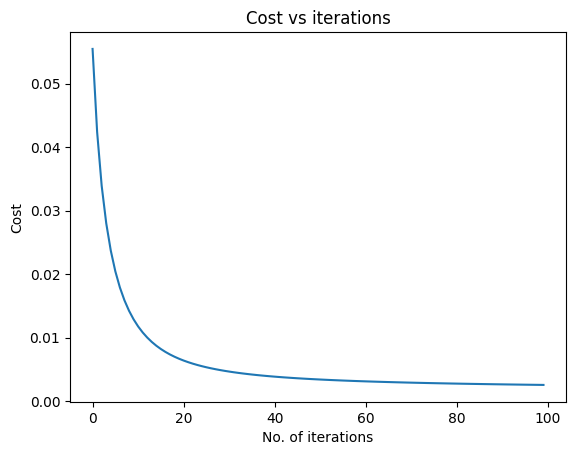

In [8]:
model.plot_cost()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], shape=(10000,))

Accuracy: 0.9993
Precision: 0.9990128331688055
Recall: 0.9986842105263158
F1 Score: 0.9988484948182267
Confusion Matrix:
[[6957    3]
 [   4 3036]]


(np.float64(0.9993),
 np.float64(0.9990128331688055),
 np.float64(0.9986842105263158),
 np.float64(0.9988484948182267),
 array([[6957,    3],
        [   4, 3036]]))

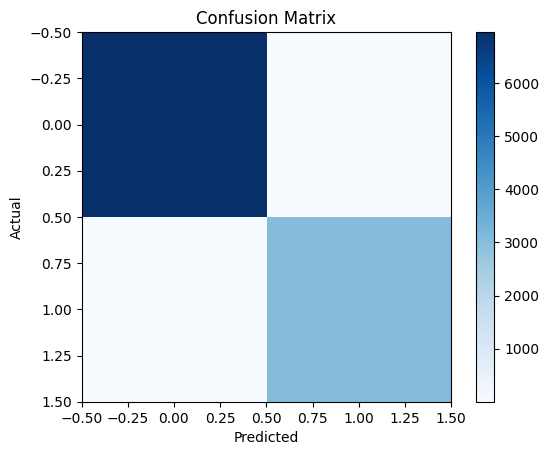

In [10]:
model.evaluation_metrics(y_test, y_pred)


In [11]:
df_test = pd.read_csv('./dataset/test_binary.csv')
df_test.shape

(25000, 25)

In [12]:
df_test.sample(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
12319,659.998636,0.490799,4327.648281,10.136157,0.002999,66201.583875,628.396146,0.453017,3904.479143,13.209403,...,12.688524,88.761159,0.987144,2015.858503,144.833533,0.445095,1489.140744,1.918922,-3.241615,-1.0
7900,548.435989,0.512260,5344.538383,95.733460,0.004627,50912.471551,518.384349,0.473906,4690.668491,86.530782,...,7.031073,75.157129,0.932212,2245.009902,257.703064,0.339079,438.011445,0.354948,-0.033994,1.0
20730,566.417696,0.504398,5383.262958,32.917917,0.005764,48660.496323,542.323137,0.461726,4642.525219,15.148147,...,8.210828,69.840476,1.164568,2997.237953,269.951283,0.393291,1531.436493,1.395311,-0.102325,1.0
16931,474.826150,0.504741,3713.941056,106.453413,0.006135,56518.421129,456.724245,0.463839,3282.391790,82.842391,...,5.116039,35.608888,1.110199,3124.134303,229.770119,0.408883,1457.244749,1.292519,0.739568,-1.0
6209,486.170727,0.489375,6331.999535,181.489561,0.003452,27466.260523,462.211792,0.448876,5438.435342,152.883756,...,3.850880,100.882507,1.059801,2336.912274,205.464237,0.314610,1607.531721,2.104862,3.488060,1.0


In [13]:
X_testing = df_test.values
X_testing = z_score_normalization(X_testing)

In [14]:
y_pred_test = model.predict(X_testing)
y_pred_test

array([0, 0, 1, ..., 0, 0, 0], shape=(25000,))

In [15]:
df_test['label'] = y_pred_test
df_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,label
0,425.961417,0.499021,5534.216993,158.937483,0.003203,40326.757559,392.911630,0.462618,4839.965545,109.779291,...,48.159841,1.055733,2512.532685,81.660268,0.389696,722.416800,1.294156,1.738285,1.0,0
1,621.169873,0.491361,5451.920192,134.151060,0.004912,46801.608384,586.622737,0.451685,4652.116744,123.802102,...,89.110342,1.121912,2878.217512,193.418479,0.367436,1044.469536,0.818993,0.028234,-1.0,0
2,674.759463,0.497538,4353.708167,144.341660,0.005261,18439.406062,641.720752,0.460264,3963.570118,130.214181,...,52.844750,0.976829,2379.556453,208.435965,0.344384,377.734099,1.097345,-0.824431,-1.0,1
3,555.548489,0.515458,5888.622134,126.766461,0.004454,31774.488278,536.516886,0.474615,5151.605518,94.595414,...,115.401214,0.701615,2546.142182,170.688107,0.327638,588.388582,1.037413,0.995409,1.0,0
4,561.974757,0.494302,5505.669060,109.243006,0.004877,58478.356459,540.144512,0.458056,4862.586548,85.480364,...,83.822568,0.801240,2843.177513,239.436877,0.310055,388.434472,0.538400,-0.104211,-1.0,0


In [16]:
df_test.to_csv('./output/predictions_logistic_regression.csv', index=False)